Unloading the dataset from the zip file

In [ ]:
!unzip greek.zip

Importing necessary libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




Loading the dataset and splitting it

In [3]:
# Reading the datasets without column names
training_dataset = pd.read_csv('train.csv', header=None)
testing_dataset = pd.read_csv('test.csv', header=None)

X_train = training_dataset.iloc[:, :-1]
y_train = training_dataset.iloc[:, -1]

X_test = testing_dataset.iloc[:, :-1]
y_test = testing_dataset.iloc[:, -1]

Printing the frequency of each label in the dataset

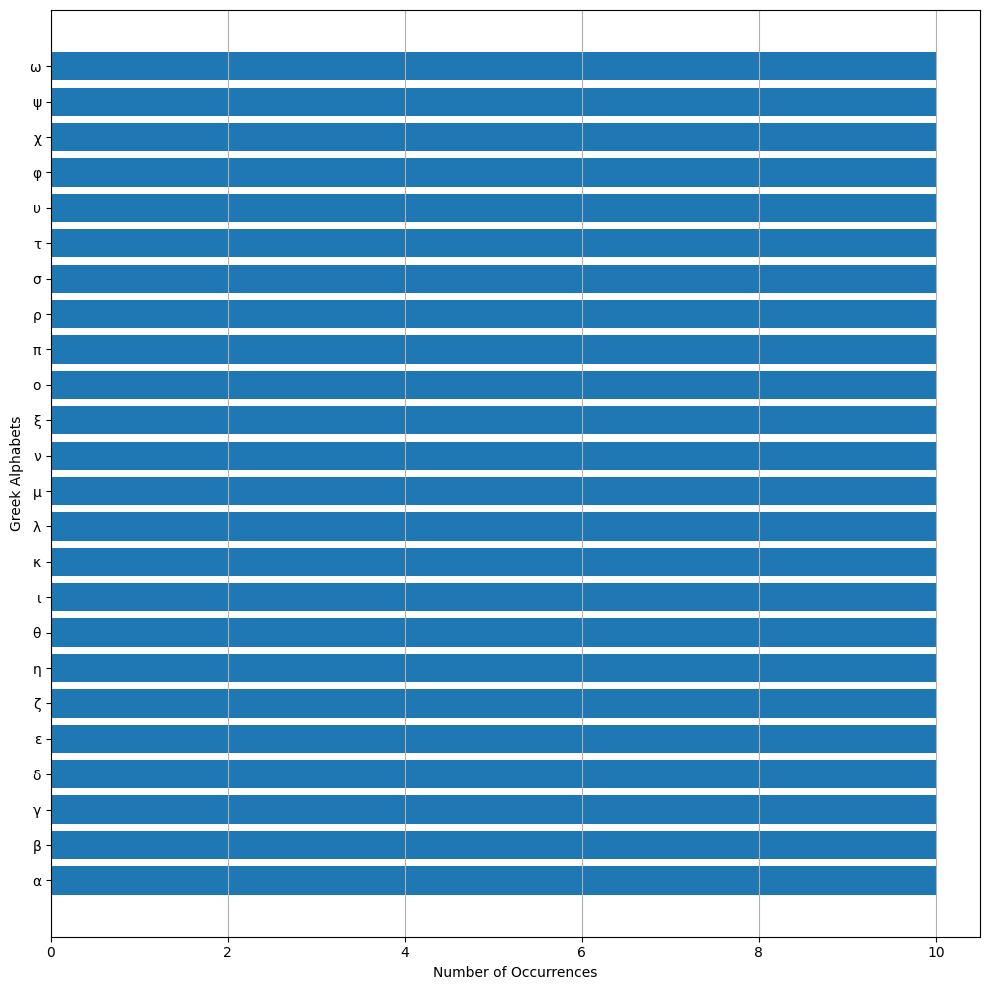

In [4]:
# Convert target values to integer type
int_labels = y_train.astype(int)

# Tally the instances of each unique number
letter_tallies = np.bincount(int_labels)[1:]  # Exclude count of the label 0

# Define the mapping of numbers to Greek letters
greek_map = {
    1: 'α', 2: 'β', 3: 'γ', 4: 'δ', 5: 'ε', 6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
    11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο', 16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
    21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'
}

# Obtain Greek letters using the defined mapping
greek_labels = list(greek_map.values())

# Visualize the tallies
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(greek_labels, letter_tallies)

ax.set_xlabel("Number of Occurrences")
ax.set_ylabel("Greek Alphabets")
ax.grid(axis='x')
plt.tight_layout()
plt.show()


Plotting the data

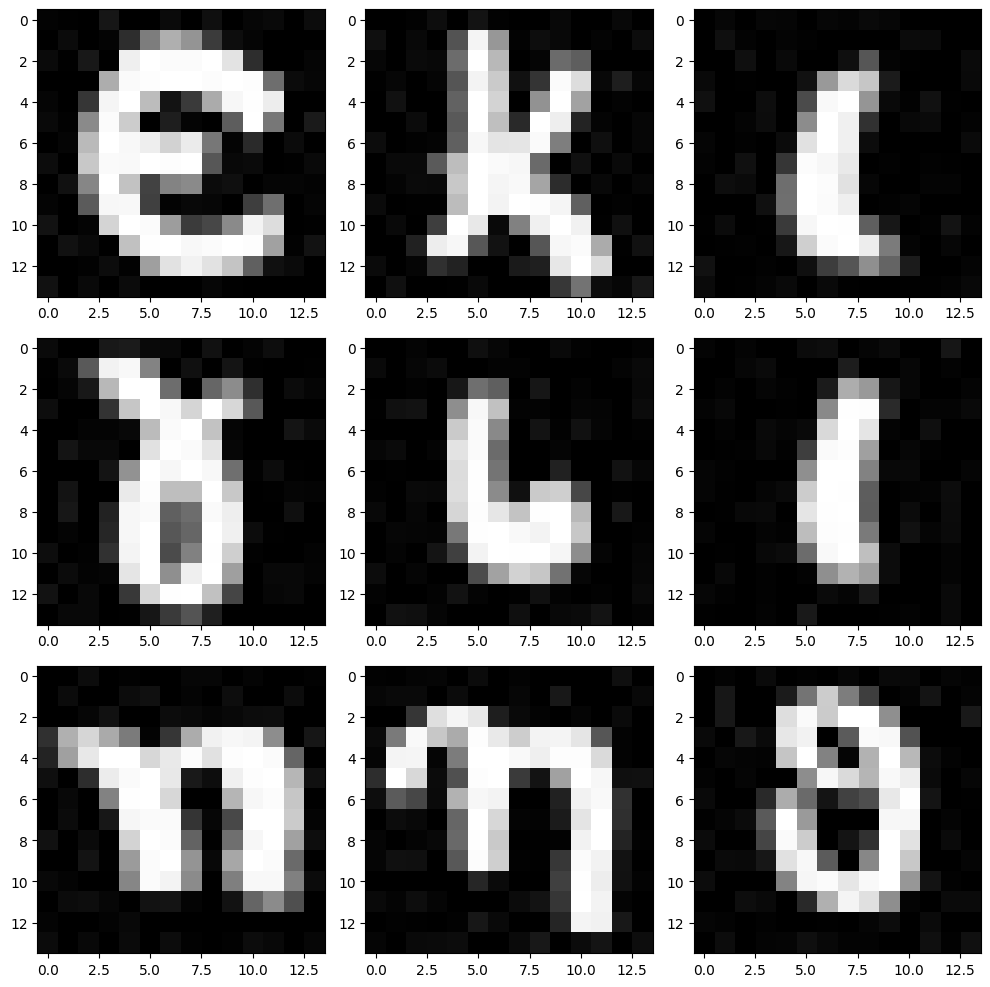

In [5]:
# Randomly shuffle the first 100 elements of X_train
import cv2

# Shuffle the first 100 training samples
shuffled_samples = np.random.permutation(X_train[:100])

# Set up a 3x3 grid for visualization
fig, grid_axes = plt.subplots(3, 3, figsize=(10, 10))
flattened_grid = grid_axes.flatten()

for i in range(9):
    _, binarized_image = cv2.threshold(shuffled_samples[i], 30, 200, cv2.THRESH_BINARY)
    flattened_grid[i].imshow(shuffled_samples[i].reshape(14, 14), cmap="Greys")

plt.tight_layout()
plt.show()


KNN Implementation

In [6]:


# Data normalization step
normalizer = StandardScaler()

#   KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 5-fold cross-validation on training data
cv_results = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Displaying the results of each fold
print("Results from 5-fold Cross Validation:", cv_results)

# Computing average and variation of cross-validation results
average_accuracy = cv_results.mean()
accuracy_variation = cv_results.std()
print(f"Average Score: {average_accuracy * 100:.2f}%")
print(f"Score Variance: {accuracy_variation * 100:.2f}%")

# Training the KNN model on the entire training set
knn_classifier.fit(X_train, y_train)

# Prediction on testing data
predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on Test Set: {knn_accuracy * 100:.2f}%')


Results from 5-fold Cross Validation: [0.89583333 0.91666667 0.85416667 0.8125     0.83333333]
Average Score: 86.25%
Score Variance: 3.86%
Accuracy on Test Set: 89.58%


Tuning hyperparameters

The optimal number of neighbors is: 1


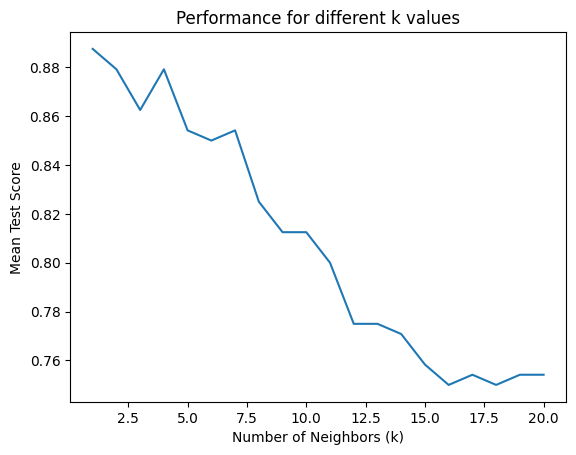

In [7]:
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_gscv = GridSearchCV(knn_classifier, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)


best_k = knn_gscv.best_params_['n_neighbors']
print(f"The optimal number of neighbors is: {best_k}")

# Plotting the results
plt.plot(np.arange(1, 21), knn_gscv.cv_results_['mean_test_score'])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Performance for different k values')
plt.show()


Confusion Matrix for KNN algorithm

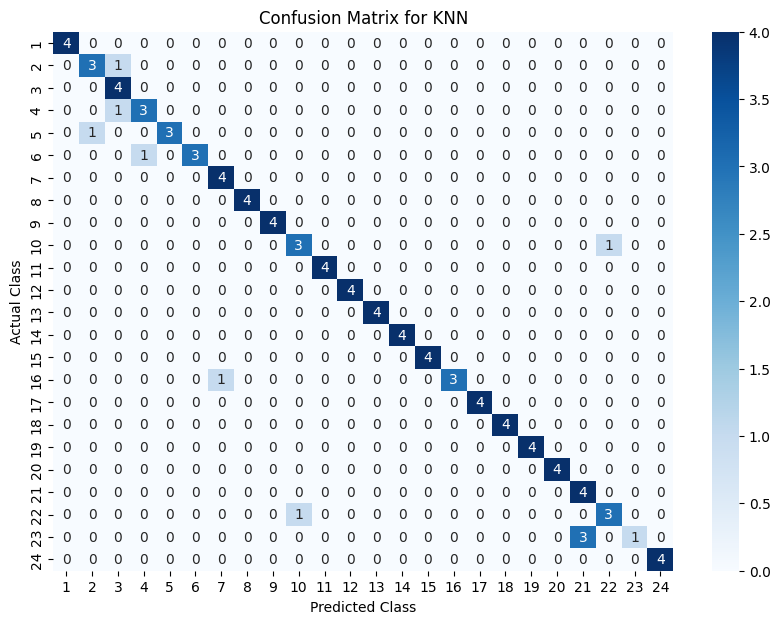

In [8]:
y_pred = knn_classifier.predict(X_test)

# Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=range(1, 25), yticklabels=range(1, 25))
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for KNN')
plt.show()


Prediction on new data using KNN

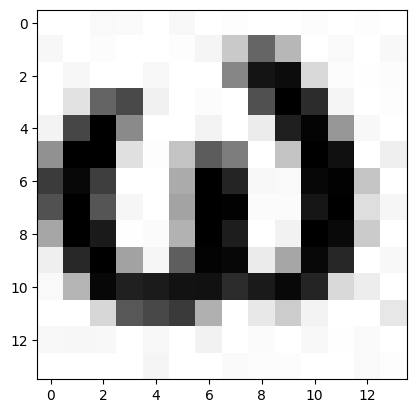

The predicted Greek alphabet is: α


In [16]:
# Path to the image
img_location = '/content/new_test.jpg'

# Read the image using the Image library
loaded_image = Image.open(img_location)

# If the image uses a palette, change it to RGBA
if loaded_image.mode == 'P':
    loaded_image = loaded_image.convert('RGBA')

# Converting the image to grayscale
loaded_image = loaded_image.convert('L')

# Adjustong the size of the image to 14x14 pixels
loaded_image = loaded_image.resize((14, 14))

# Transforming the image to a numpy array
array_form = np.array(loaded_image).ravel()

# Reshaping the array
array_form = array_form.reshape(1, -1)

plt.imshow(loaded_image, cmap='gray')
plt.show()
normalizer.fit(X_train)
normalized_image_data = normalizer.transform(array_form)
inference = knn_classifier.predict(normalized_image_data)

# Dictionary to convert label to its corresponding Greek letter
number_to_greek = {
    1: 'α', 2: 'β', 3: 'γ', 4: 'δ', 5: 'ε',
    6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
    11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο',
    16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
    21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'
}
resulting_greek = number_to_greek[int(inference[0])]

print("The predicted Greek alphabet is:", resulting_greek)



CNN Implementation

In [11]:
X_train = training_dataset.iloc[:, :-1]
y_train = training_dataset.iloc[:, -1]

X_test = testing_dataset.iloc[:, :-1]
y_test = testing_dataset.iloc[:, -1]

# Reshaping the data to fit the CNN input shape
X_train_cnn = X_train.to_numpy().reshape(-1, 14, 14, 1)
X_test_cnn = X_test.to_numpy().reshape(-1, 14, 14, 1)

# Normalizing the data
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

# Convert labels to one-hot encoding
y_train_cnn = tf.keras.utils.to_categorical(y_train - 1, 24)
y_test_cnn = tf.keras.utils.to_categorical(y_test - 1, 24)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(14, 14, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(24, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train_cnn, epochs=50, validation_data=(X_test_cnn, y_test_cnn))

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test_cnn, y_test_cnn)
print(f"CNN Accuracy: {cnn_accuracy*100:.2f}")


model.summary()
model.save(r'model_hand.h5')


Epoch 1/50
8/8 [==============================] - 3s 65ms/step - loss: 3.1929 - accuracy: 0.0292 - val_loss: 3.1447 - val_accuracy: 0.1042
Epoch 2/50
8/8 [==============================] - 0s 17ms/step - loss: 3.1482 - accuracy: 0.1167 - val_loss: 3.1232 - val_accuracy: 0.1354
Epoch 3/50
8/8 [==============================] - 0s 19ms/step - loss: 3.1152 - accuracy: 0.1625 - val_loss: 3.0839 - val_accuracy: 0.2708
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - loss: 3.0840 - accuracy: 0.1667 - val_loss: 3.0242 - val_accuracy: 0.2917
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 3.0044 - accuracy: 0.2542 - val_loss: 2.9308 - val_accuracy: 0.4375
Epoch 6/50
8/8 [==============================] - 0s 23ms/step - loss: 2.8950 - accuracy: 0.3250 - val_loss: 2.7858 - val_accuracy: 0.4583
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 2.7347 - accuracy: 0.3542 - val_loss: 2.5798 - val_accuracy: 0.4062
Epoch 8/50
8/8 [===========

3/3 [==============================] - 0s 3ms/step


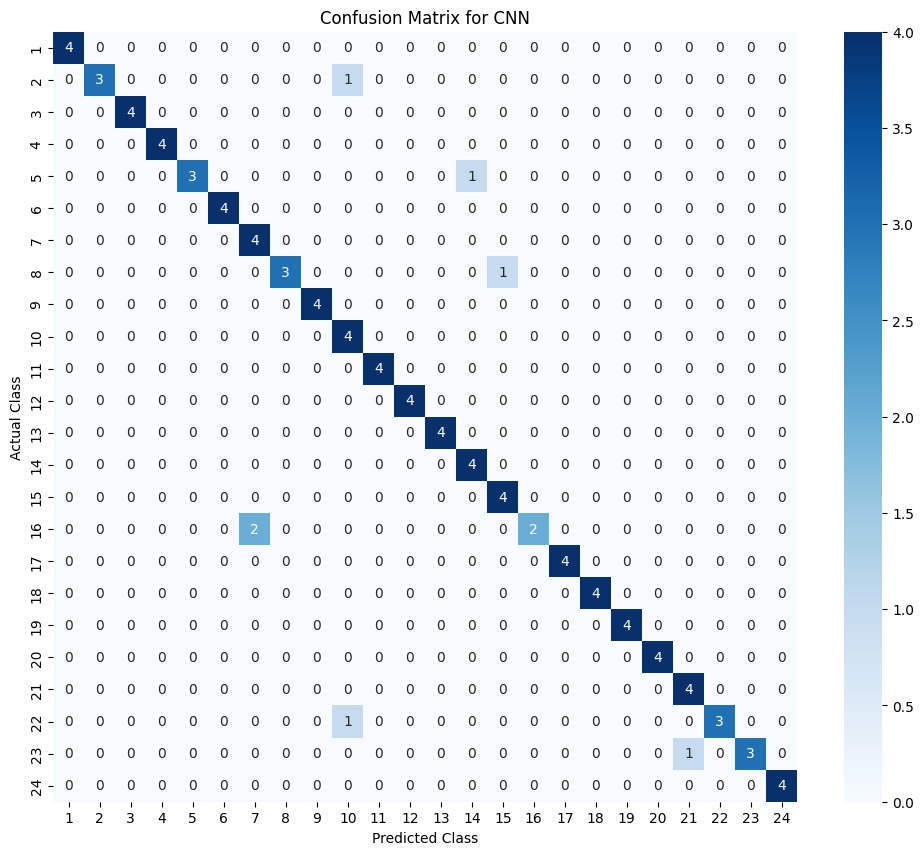

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for X_test
y_pred_probs = model.predict(X_test_cnn)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 25), yticklabels=range(1, 25))
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for CNN')
plt.show()


Predicting on test data

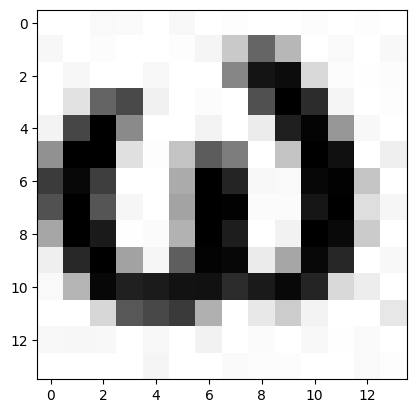

1/1 [==============================] - 0s 58ms/step
The predicted Greek alphabet (using CNN) is: ω


In [13]:


# Path to the image
img_location = '/content/new_test.jpg'

# Read the image using the Image library
loaded_image = Image.open(img_location)

# Convert the image to grayscale
loaded_image = loaded_image.convert('L')

# Adjust the size of the image to 14x14 pixels
loaded_image = loaded_image.resize((14, 14))

# Transform the image to a numpy array and reshape it for CNN input
array_form = np.array(loaded_image).reshape(1, 14, 14, 1) / 255.0

import matplotlib.pyplot as plt

# Visualize the altered image
plt.imshow(loaded_image, cmap='gray')
plt.show()

# Use the trained CNN model to get a prediction
inference = model.predict(array_form)
predicted_label = np.argmax(inference)

# Dictionary to convert label to its corresponding Greek letter
number_to_greek = {
    0: 'α', 1: 'β', 2: 'γ', 3: 'δ', 4: 'δ', 5: 'ε',
    6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
    11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο',
    16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
    21: 'φ', 22: 'χ', 23: 'ω', 24: 'ψ'
}

resulting_greek = number_to_greek[predicted_label]

# Display the resulting prediction
print("The predicted Greek alphabet (using CNN) is:", resulting_greek)


Random Forest

Best Parameters: {'max_depth': 50, 'n_estimators': 500}
Random Forest Accuracy with Best Parameters: 86.32%


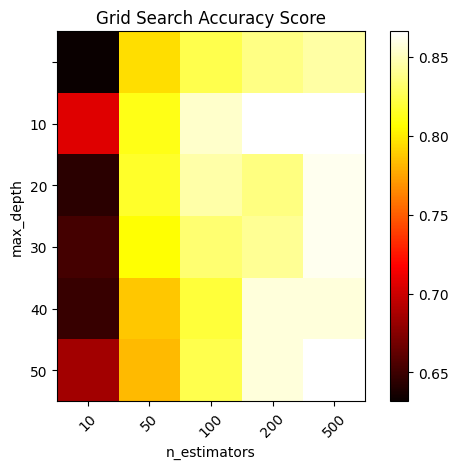

In [14]:

# Load the data
train_data = pd.read_csv('train.csv')
X_train_rf = train_data.iloc[:, :-1].values
y_train_rf = train_data.iloc[:, -1].values

test_data = pd.read_csv('test.csv')
X_test_rf = test_data.iloc[:, :-1].values
y_test_rf = test_data.iloc[:, -1].values

# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Create a random forest classifier
clf = RandomForestClassifier()

# Use GridSearchCV to find the best hyperparameters using 5-fold cross-validation
gscv = GridSearchCV(clf, param_grid, cv=5)
gscv.fit(X_train_rf, y_train_rf)

# Output the best parameters
print(f"Best Parameters: {gscv.best_params_}")

# Evaluate the classifier using the best found parameters
best_clf = gscv.best_estimator_
rf_accuracy = best_clf.score(X_test_rf, y_test_rf)
print(f"Random Forest Accuracy with Best Parameters: {rf_accuracy * 100:.2f}%")

# Plotting the results
scores_matrix = np.array(gscv.cv_results_['mean_test_score']).reshape(6,5)
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['n_estimators'], rotation=45)
plt.yticks(np.arange(6), param_grid['max_depth'])
plt.title('Grid Search Accuracy Score')
plt.show()


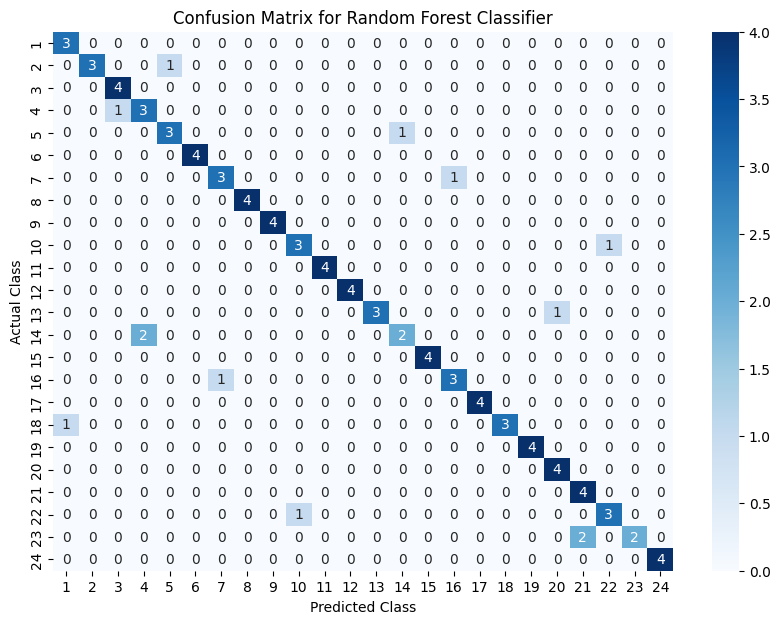

In [20]:

#normalizer.fit(X_train_rf)
# Predict using the classifier
y_pred = best_clf.predict(X_test_rf)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test_rf, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=range(1, 25), yticklabels=range(1, 25))
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


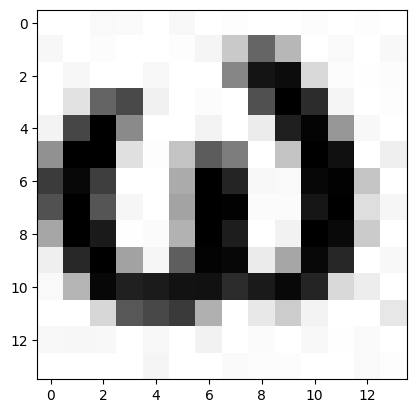

The predicted Greek alphabet (using Random Forest) is: ω


In [22]:


# Path to the image
img_location = '/content/new_test.jpg'

# Read the image using the Image library
loaded_image = Image.open(img_location)

# If the image uses a palette, change it to RGBA
if loaded_image.mode == 'P':
    loaded_image = loaded_image.convert('RGBA')

# Convert the image to grayscale
loaded_image = loaded_image.convert('L')

# Adjust the size of the image to 14x14 pixels
loaded_image = loaded_image.resize((14, 14))

# Transform the image to a numpy array and make it a 1D array
array_form = np.array(loaded_image).ravel()

# Alter the shape to ensure compatibility (1, 196)
array_form = array_form.reshape(1, -1)

# Visualize the altered image
plt.imshow(loaded_image, cmap='gray')
plt.show()

# Assuming you normalized the training data using some method like MinMaxScaler
# Here, we'll use the normalizer object you might have defined earlier:
# normalized_image_data = normalizer.transform(array_form)

# Use the trained Random Forest model to get a prediction
inference = best_clf.predict(array_form)

# Dictionary to convert label to its corresponding Greek letter
number_to_greek = {
    1: 'α', 2: 'β', 3: 'γ', 4: 'δ', 5: 'ε',
    6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
    11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο',
    16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
    21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'
}

if int(inference[0]) in number_to_greek:
    resulting_greek = number_to_greek[int(inference[0])]
    print("The predicted Greek alphabet (using Random Forest) is:", resulting_greek)
else:
    print(f"Unexpected prediction: {int(inference[0])}. Cannot map to a Greek letter.")


Comparison of Algorithms

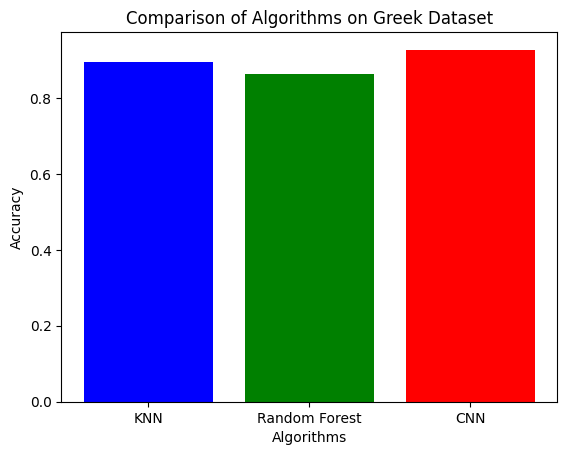

In [23]:
# Plotting the comparison
import matplotlib.pyplot as plt
labels = ['KNN', 'Random Forest', 'CNN']
accuracies = [knn_accuracy, rf_accuracy, cnn_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.title('Comparison of Algorithms on Greek Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()